In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel(r"/Users/sunnyzheng/Desktop/MMAI 5000/Group data.xlsx")

In [4]:
df

,Unnamed: 0,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,10255,202101013246,2021-11-02 15:06:47,2021-11-02 15:21:18,Smartphone,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,The Republican Party,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"Less than $30,000",You are NOT registered to vote at your current...,Moderate,Almost constantly,No,Lower income,0.425901
10256,10256,202101013292,2021-11-02 12:18:58,2021-11-02 12:32:49,Smartphone,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Dem/Lean Dem,Liberal Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Upper income,0.157638
10257,10257,202101013344,2021-11-04 16:30:29,2021-11-06 11:08:56,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,The Democratic Party,Dem/Lean Dem,Liberal Dem/Lean,"Less than $30,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Almost constantly,Yes,Lower income,0.282079
10258,10258,202101013446,2021-11-06 15:22:13,2021-11-06 16:10:36,Laptop/PC,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,0.441525


# Three main factors we are looking at: Region, Education, Political 

## Facial recognition 

#### create a new dataframe with the columns related

In [5]:
# take out the columns that are related to the facial recognition 
face_columns = [col for col in df.columns if 'FACE' in col]


In [6]:
face_df = df[face_columns].copy()

In [7]:
face_df

,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,FACEREC5_W99,...,FACEREC8_c_W99,FACEREC9_W99,FACEREC10_W99,FACEREC11_a_W99,FACEREC11_b_W99,FACEREC11_c_W99,FACEREC12_a_W99,FACEREC12_b_W99,FACEREC12_c_W99,FACEREC12_d_W99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,Stay about the same,...,No difference,People should assume they are being monitored ...,Yes,Acceptable,Acceptable,Acceptable,Not sure,Not sure,Favor,Not sure
2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,Decrease in the U.S.,...,More acceptable,People should assume they are being monitored ...,No,Acceptable,Acceptable,Acceptable,Favor,Oppose,Oppose,Not sure
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,Increase in the U.S.,...,More acceptable,People should have a right to privacy when the...,Yes,Acceptable,Not acceptable,Not acceptable,Favor,Oppose,Favor,Favor
10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,Decrease in the U.S.,...,More acceptable,People should assume they are being monitored ...,No,Acceptable,Acceptable,Not acceptable,Not sure,Not sure,Favor,Favor


In [8]:
# add on the columns of 3 main factors
additional_columns = ['F_CREGION', 'F_PARTY_FINAL', 'F_EDUCCAT']
for col in additional_columns:
    if col in df.columns:
        face_df[col] = df[col]
        
print (face_df)

      FACEREC1_W99           FACEREC2_W99             FACEREC3_a_W99  \
0              NaN                    NaN                        NaN   
1         A little  Good idea for society      Probably would happen   
2         A little  Good idea for society  Probably would NOT happen   
3              NaN                    NaN                        NaN   
4              NaN                    NaN                        NaN   
...            ...                    ...                        ...   
10255          NaN                    NaN                        NaN   
10256          NaN                    NaN                        NaN   
10257        A lot  Good idea for society    Definitely would happen   
10258        A lot               Not sure  Probably would NOT happen   
10259     A little  Good idea for society  Probably would NOT happen   

                FACEREC3_b_W99             FACEREC3_c_W99  \
0                          NaN                        NaN   
1        Prob

In [9]:
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FACEREC1_W99     5153 non-null   object
 1   FACEREC2_W99     5153 non-null   object
 2   FACEREC3_a_W99   5153 non-null   object
 3   FACEREC3_b_W99   5153 non-null   object
 4   FACEREC3_c_W99   5153 non-null   object
 5   FACEREC3_d_W99   5153 non-null   object
 6   FACEREC3_e_W99   5153 non-null   object
 7   FACEREC3_f_W99   5153 non-null   object
 8   FACEREC4_W99     5153 non-null   object
 9   FACEREC5_W99     5153 non-null   object
 10  FACEREC6_a_W99   5153 non-null   object
 11  FACEREC6_b_W99   5153 non-null   object
 12  FACEREC6_c_W99   5153 non-null   object
 13  FACEREC6_d_W99   5153 non-null   object
 14  FACEREC7_W99     5153 non-null   object
 15  FACEREC8_a_W99   5153 non-null   object
 16  FACEREC8_b_W99   5153 non-null   object
 17  FACEREC8_c_W99   5153 non-null 

In [10]:
face_df_cleaned = face_df.dropna().reset_index()
face_df_cleaned

,index,FACEREC1_W99,FACEREC2_W99,FACEREC3_a_W99,FACEREC3_b_W99,FACEREC3_c_W99,FACEREC3_d_W99,FACEREC3_e_W99,FACEREC3_f_W99,FACEREC4_W99,...,FACEREC11_a_W99,FACEREC11_b_W99,FACEREC11_c_W99,FACEREC12_a_W99,FACEREC12_b_W99,FACEREC12_c_W99,FACEREC12_d_W99,F_CREGION,F_PARTY_FINAL,F_EDUCCAT
0,1,A little,Good idea for society,Probably would happen,Probably would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Acceptable,Acceptable,Acceptable,Not sure,Not sure,Favor,Not sure,Midwest,Republican,Some College
1,2,A little,Good idea for society,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would happen,More fair,...,Acceptable,Acceptable,Acceptable,Favor,Oppose,Oppose,Not sure,Northeast,Democrat,College graduate+
2,5,Nothing at all,Good idea for society,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would NOT happen,More fair,...,Acceptable,Acceptable,Not acceptable,Oppose,Oppose,Favor,Favor,Midwest,Republican,College graduate+
3,6,Nothing at all,Not sure,Probably would happen,Probably would happen,Probably would happen,Probably would happen,Probably would NOT happen,Probably would NOT happen,Not make much difference,...,Not acceptable,Not acceptable,Not acceptable,Oppose,Oppose,Oppose,Oppose,South,Republican,Some College
4,8,A little,Good idea for society,Definitely would NOT happen,Probably would happen,Definitely would NOT happen,Probably would happen,Probably would NOT happen,Definitely would happen,More fair,...,Acceptable,Acceptable,Not acceptable,Favor,Oppose,Oppose,Favor,West,Republican,Some College
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,10252,A lot,Bad idea for society,Definitely would happen,Probably would happen,Definitely would happen,Probably would happen,Probably would happen,Probably would NOT happen,Not make much difference,...,Not acceptable,Not acceptable,Not acceptable,Oppose,Oppose,Favor,Favor,West,Independent,College graduate+
5149,10253,A little,Good idea for society,Probably would NOT happen,Definitely would happen,Definitely would NOT happen,Definitely would happen,Probably would happen,Probably would happen,More fair,...,Acceptable,Acceptable,Not acceptable,Oppose,Favor,Favor,Favor,Midwest,Independent,H.S. graduate or less
5150,10257,A lot,Good idea for society,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,Definitely would happen,More fair,...,Acceptable,Not acceptable,Not acceptable,Favor,Oppose,Favor,Favor,South,Independent,Some College
5151,10258,A lot,Not sure,Probably would NOT happen,Probably would happen,Probably would NOT happen,Probably would happen,Probably would happen,Probably would happen,Not make much difference,...,Acceptable,Acceptable,Not acceptable,Not sure,Not sure,Favor,Favor,Midwest,Republican,Some College


In [11]:
face_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            5153 non-null   int64 
 1   FACEREC1_W99     5153 non-null   object
 2   FACEREC2_W99     5153 non-null   object
 3   FACEREC3_a_W99   5153 non-null   object
 4   FACEREC3_b_W99   5153 non-null   object
 5   FACEREC3_c_W99   5153 non-null   object
 6   FACEREC3_d_W99   5153 non-null   object
 7   FACEREC3_e_W99   5153 non-null   object
 8   FACEREC3_f_W99   5153 non-null   object
 9   FACEREC4_W99     5153 non-null   object
 10  FACEREC5_W99     5153 non-null   object
 11  FACEREC6_a_W99   5153 non-null   object
 12  FACEREC6_b_W99   5153 non-null   object
 13  FACEREC6_c_W99   5153 non-null   object
 14  FACEREC6_d_W99   5153 non-null   object
 15  FACEREC7_W99     5153 non-null   object
 16  FACEREC8_a_W99   5153 non-null   object
 17  FACEREC8_b_W99   5153 non-null   

In [12]:
#save the new dataframe into a excel
face_df_cleaned.to_excel('facial recognition cleaned.xlsx', index=False)

### pull out the columns for question FACEREC1 - How much have you heard or read about facial recognition technology by police?
+ first see the relation between it and education

In [13]:
cl = face_df_cleaned[['FACEREC1_W99', 'F_EDUCCAT']].copy()
cl

,FACEREC1_W99,F_EDUCCAT
0,A little,Some College
1,A little,College graduate+
2,Nothing at all,College graduate+
3,Nothing at all,Some College
4,A little,Some College
...,...,...
5148,A lot,College graduate+
5149,A little,H.S. graduate or less
5150,A lot,Some College
5151,A lot,Some College


In [25]:
def heared_f (x):
    if x == 'A lot':
        return 1
    elif x == 'A little':
        return 1
    else:
        return 0

cl['num_heard'] = cl['FACEREC1_W99'].apply(heared_f)
cl

,FACEREC1_W99,F_EDUCCAT,num_heard,fre_heard
0,A little,Some College,1,1
1,A little,College graduate+,1,1
2,Nothing at all,College graduate+,0,0
3,Nothing at all,Some College,0,0
4,A little,Some College,1,1
...,...,...,...,...
5148,A lot,College graduate+,1,2
5149,A little,H.S. graduate or less,1,1
5150,A lot,Some College,1,2
5151,A lot,Some College,1,2


In [15]:
# total number of people heard or read about facial recognition before
total = cl['num_heard'].sum()
total

4298

In [16]:
# the people heard about it in each education group
ppl_h = cl[cl['num_heard'] == 1].groupby('F_EDUCCAT').size()
ppl_h

F_EDUCCAT
College graduate+        2274
H.S. graduate or less     644
Refused                    11
Some College             1369
dtype: int64

In [17]:
#proportion of people heard about it in each education group
percent_heard =ppl_h/total
percent_heard

F_EDUCCAT
College graduate+        0.529083
H.S. graduate or less    0.149837
Refused                  0.002559
Some College             0.318520
dtype: float64

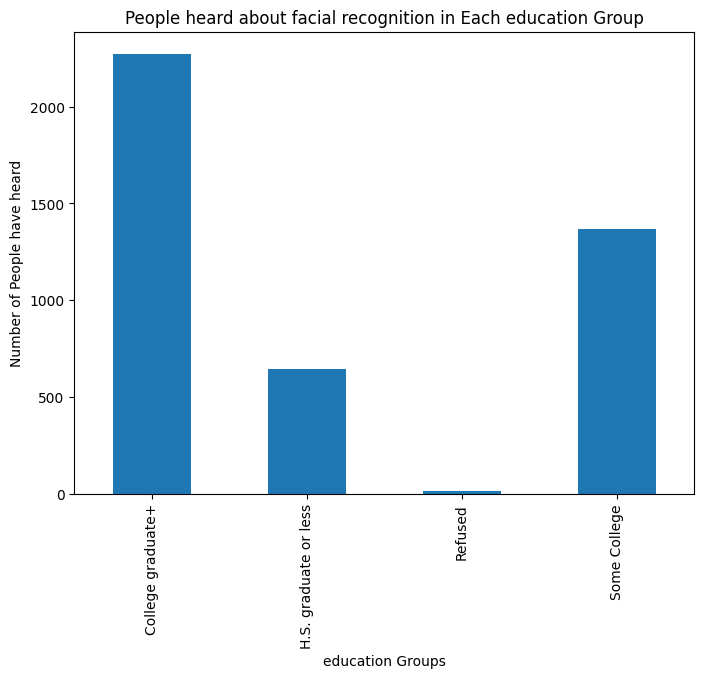

In [18]:
#plot 
plt.figure(figsize=(8,6))
ppl_h.plot(x= 'heard', y='ppl_h', kind='bar')
plt.title('People heard about facial recognition in Each education Group')
plt.xlabel('education Groups')
plt.ylabel('Number of People have heard')
plt.savefig("numbers of people have heard facial recognition.png")
plt.show()

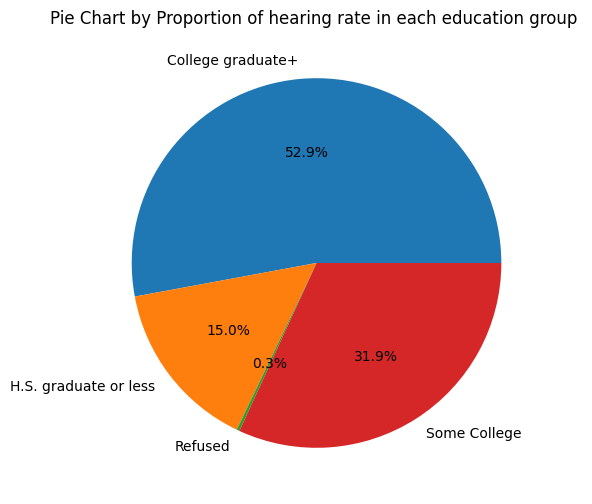

In [19]:
# pie plot show the proportion 
plt.figure(figsize=(6,6))
plt.title("Pie Chart by Proportion of hearing rate in each education group ")
plt.pie(percent_heard,labels=percent_heard.index,autopct='%1.1f%%')
plt.savefig("proportion of people have heard facial recognition.png")
plt.show()

In [20]:
#as we have 5153 observations -> find the proportion 
4298 / 5153

0.8340772365612265

In [21]:
# frequency of def he_f (x):
def freq_hear(x):
    if x == 'A lot':
        return 2
    elif x == 'A little':
        return 1
    else:
        return 0

cl['fre_heard'] = cl['FACEREC1_W99'].apply(freq_hear)
cl['fre_heard']

0       1
1       1
2       0
3       0
4       1
       ..
5148    2
5149    1
5150    2
5151    2
5152    1
Name: fre_heard, Length: 5153, dtype: int64

+ so 4298 of people has heared about it before, which occupied the 83.4%.

In [22]:
# the average time of people heard about facial recognition by each educationt level
educ_heard = cl.groupby('F_EDUCCAT')['fre_heard'].mean()
educ_heard

F_EDUCCAT
College graduate+        1.101527
H.S. graduate or less    0.914481
Refused                  0.875000
Some College             1.059146
Name: fre_heard, dtype: float64

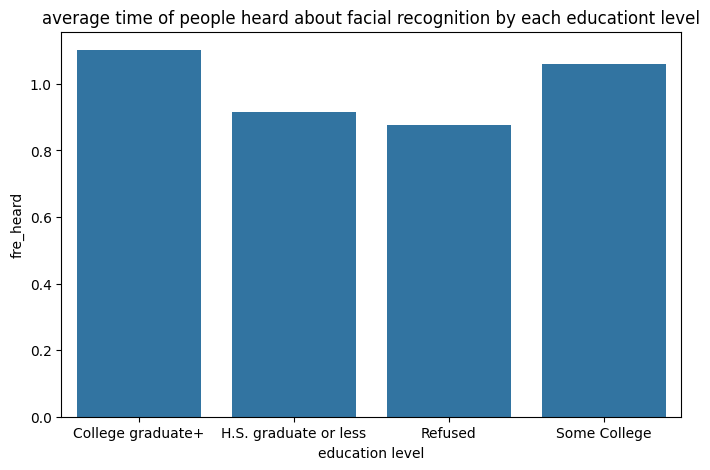

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(educ_heard)
plt.title('average time of people heard about facial recognition by each educationt level')
plt.xlabel('education level')
plt.savefig("average time heard facial recognition.png")
plt.show()